# Let’s Build our Image Classification Model!

---

# Step 1:- Import the required libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import layers

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

from tqdm import tqdm

# from config import config as CONFIG
# config = CONFIG()

Using TensorFlow backend.


---

# Step 2:- Loading the data 

In [2]:
labels = ['cat', 'dog']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in  tqdm(os.listdir(path)):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
#Now we can easily fetch our train and validation data.
train = get_data("../input/train")

100%|██████████| 12500/12500 [00:49<00:00, 252.88it/s]


In [5]:
np.random.shuffle(train)

---

# Step 3:- Visualize the data 

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

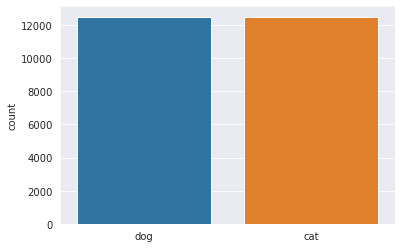

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("cat")
    else:
        l.append("dog")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'dog')

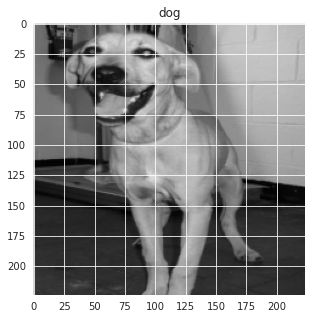

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[1][1]])

Text(0.5, 1.0, 'dog')

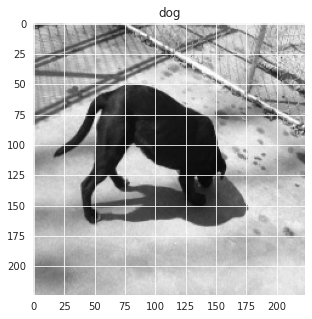

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

---

# Step 4:- Data Preprocessing and Data Augmentation


In [10]:
train[:,0].shape

(25000,)

In [11]:
x_train = []
y_train = []


for feature, label in train:
  x_train.append(feature)
  y_train.append(label)


X = np.array(x_train) / 255
y = np.array(y_train) 

X.reshape(-1, img_size, img_size, 1)

print(f"Image array shape -- ",X.shape)
print(f"Image label shape -- ",y.shape)

Image array shape --  (25000, 224, 224, 3)
Image label shape --  (25000,)


In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False,
        validation_split=0.2)  # randomly flip images


datagen.fit(X)



---

# Step 5:- Define the Model 



In [13]:
def net(WIDTH = 224,HEIGHT = 224,C = 3):
    model = Sequential() # implement model layer 
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, C), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [14]:
opt = Adam(lr=0.0001)
model = net()
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [15]:
epochs = 10
history = model.fit(datagen.flow(X, y, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X, y,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(X) / 32, epochs=epochs)

Epoch 1/10
782/781 [==============================] - 462s 591ms/step - loss: 0.6873 - accuracy: 0.5455 - val_loss: 0.6772 - val_accuracy: 0.6150
Epoch 2/10
782/781 [==============================] - 461s 590ms/step - loss: 0.6535 - accuracy: 0.5980 - val_loss: 0.7033 - val_accuracy: 0.6574
Epoch 3/10
782/781 [==============================] - 459s 587ms/step - loss: 0.6290 - accuracy: 0.6372 - val_loss: 0.4977 - val_accuracy: 0.6834
Epoch 4/10
782/781 [==============================] - 459s 588ms/step - loss: 0.6096 - accuracy: 0.6645 - val_loss: 0.7589 - val_accuracy: 0.6926
Epoch 5/10
782/781 [==============================] - 458s 585ms/step - loss: 0.5955 - accuracy: 0.6807 - val_loss: 0.6639 - val_accuracy: 0.7148
Epoch 6/10
782/781 [==============================] - 458s 586ms/step - loss: 0.5865 - accuracy: 0.6885 - val_loss: 0.6650 - val_accuracy: 0.7136
Epoch 7/10
782/781 [==============================] - 459s 587ms/step - loss: 0.5794 - accuracy: 0.6960 - val_loss: 0.3928 -

# Step 6:- Evaluating the result


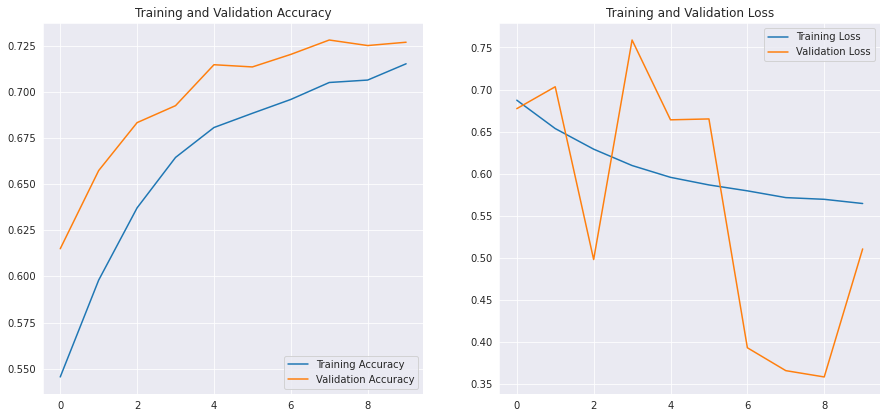

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
## get image path
test_images = os.listdir('../input/test')
import pandas as pd

#creat data frame
df_test =pd.DataFrame({
    'image': test_images,
})

df_test.head()

#prepare generator
test_data_gen  = ImageDataGenerator( rescale = 1./255, )  

batch_size = 8
testing = test_data_gen.flow_from_dataframe(
      df_test,
      directory ='../input/test'+'/',
      x_col='image',
      y_col= None,
      target_size=(224,224),
      class_mode=None,
      shuffle=True, 
      batch_size=batch_size
      )

Found 12500 validated image filenames.


---

# Predction Using CNN


In [23]:
predection = model.predict(testing)
np.argmax(predection,axis=1)[0:100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
def get_Label(pred):
    if(pred == 0):
        return "Cat"
    else:
        return "Dog"

In [28]:

#plot predction function
def plot_predection(model_name):
    plt.figure(figsize=(20,15))
    plt.suptitle("Predection  Images", fontsize=20)
    images = [] 
    path ="../input/test"
    count = 0  #val_images,val_labels
    for i,files in enumerate(os.listdir(path)) :
        img = plt.imread(os.path.join(path,files))
        img = cv2.resize(img,(224,224))
        plt.imshow(img,cmap=plt.cm.binary)
        img = np.expand_dims(img, axis=0)
        feature = model_name.predict(img)
        predection  = 0 if feature < 0.5 else 1
        plt.subplot(5,7,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("Predicted- "+get_Label(int(predection)))
        count += 1
        if count == 34 :
            break    

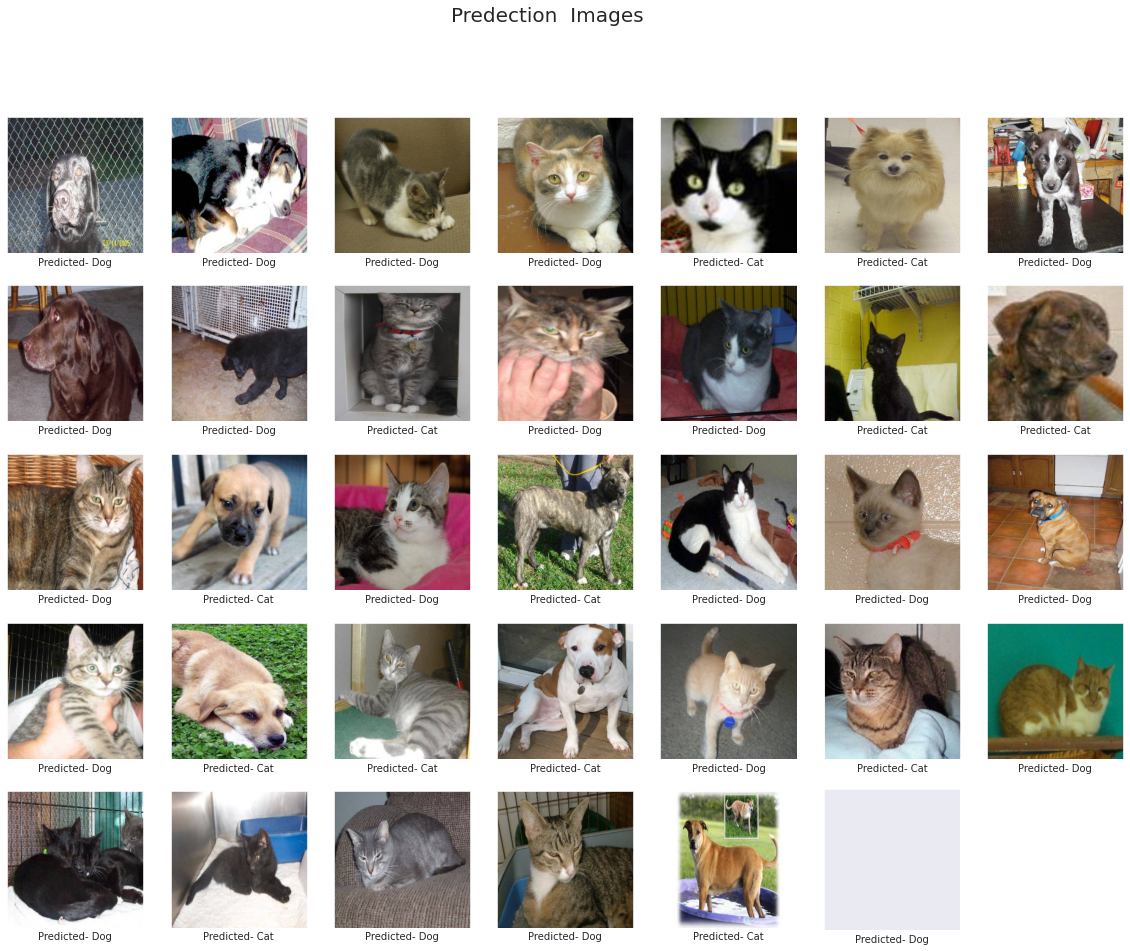

In [29]:
plot_predection(model)

In [31]:
submission_df = df_test.copy()
submission_df['id'] = submission_df['image'].str.split('.').str[0]
submission_df['label'] = predection
submission_df['label'] = submission_df['label'].apply(lambda x:  0 if x < 0.5 else 1)
submission_df.drop(['image'], axis=1, inplace=True)
submission_df.to_csv('submission_basic_cnn.csv', index=False)

# Conclusions

>- The basic CNN model we trained is not accurate enough.
>- We have trained a resnet-50 model in pytorch using Amazon Sagemaker in the notebooks `notebooks/01-Estimator-resnet50.ipynb` to achieve a better accuracy